
# MTH 354 — Lab06: Neural Networks

**Names:** Adriana Soldat  
**Collaborators (if any):**   
**Date:** 11/04/2025

> *Complete each prompt in the cells provided. Run all code cells and include plots in your submission.*




This assignment is about building neural networks in Python. You will be introduced to the PyTorch library which is commonly used in Python coding for machine learning.

**Possible Resources:**

https://www.tensorflow.org/guide/tensor

https://towardsdatascience.com/complete-guide-to-adam-optimization-1e5f29532c3d

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6




In [34]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

# Reproducibility
rng = np.random.default_rng(0)
torch.manual_seed(0)

1.) Our goal is to build a neural network which, when trained, will represent an approximation of sin(x) from a sample of N equidistant points between x=0 and x=pi/2, and examine how various changes will affect the accuracy of the network.  You will have answers filled in for this first section to understand and reuse in the following questions.

a). Generate the N equidistant points in the sin function between 0 and pi/2.


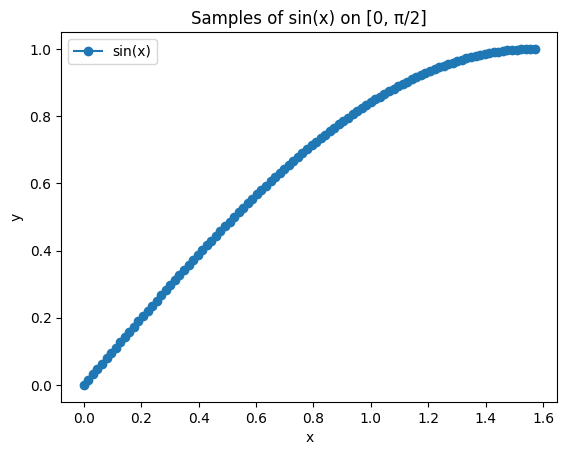

In [35]:
# a) Generate N equidistant points on [0, pi/2] and plot y=sin(x)
N = 100  # baseline
x = np.linspace(0, np.pi/2, N)
y = np.sin(x)

plt.figure()
plt.plot(x, y, marker='o', linestyle='-', label='sin(x)')
plt.title('Samples of sin(x) on [0, π/2]')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.show()


b). Reshape the data from a NumPy array into a PyTorch Tensor to prep it for the network.


In [36]:
# b) Convert NumPy arrays to PyTorch tensors
# Eg: x = torch.from_numpy(x.reshape(-1, 1)).float()

# torch.from_numpy() converts the reshaped NumPy array x into a PyTorch tensor.
# This is useful for working with neural networks because PyTorch tensors are used as the primary data structure for computations in PyTorch.

#the reshape.(-1, 1) reshapes the x np array into a 2D array where there is only one column
# -1 signals that the shape is computed based on the number of rows

#.float() converts the PyTorch tensor into a float datatype, the most common for network calculations

x_t = torch.from_numpy(x.reshape(-1, 1)).float()
y_t = torch.from_numpy(y.reshape(-1, 1)).float()
x_t.shape, y_t.shape


(torch.Size([100, 1]), torch.Size([100, 1]))

c). Define the network architecture, starting with two layers and width 10.

In [37]:
# c) Define a simple 2-layer MLP with width 10 and Tanh activation
class Net(nn.Module):
    def __init__(self, in_dim=1, hidden=10, out_dim=1, activation='tanh'):
        super().__init__()
        act = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid()}.get(activation, nn.Tanh())
        self.layer1 = nn.Linear(in_dim, hidden)
        self.act1 = act
        self.layer2 = nn.Linear(hidden, out_dim)
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.layer2(x)
        return x

net = Net(hidden=10, activation='tanh')
net


Net(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Tanh()
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

d). Define the optimizer and loss function. Start with 1000 epochs

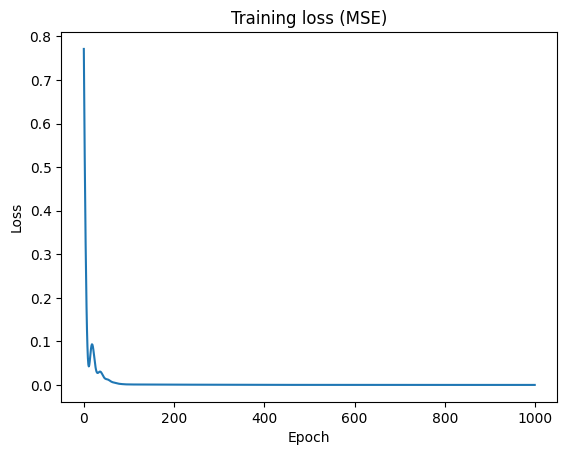

In [38]:
# d) Optimizer, loss, and training loop (1000 epochs)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

epochs = 1000
loss_hist = []
for i in range(epochs):
    optimizer.zero_grad()
    yhat = net(x_t)
    loss = loss_fn(yhat, y_t)
    loss.backward()
    optimizer.step()
    loss_hist.append(loss.item())

plt.figure()
plt.plot(loss_hist)
plt.title('Training loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.show()

with torch.no_grad():
    yhat = net(x_t)


e). Plot predicted and true functions


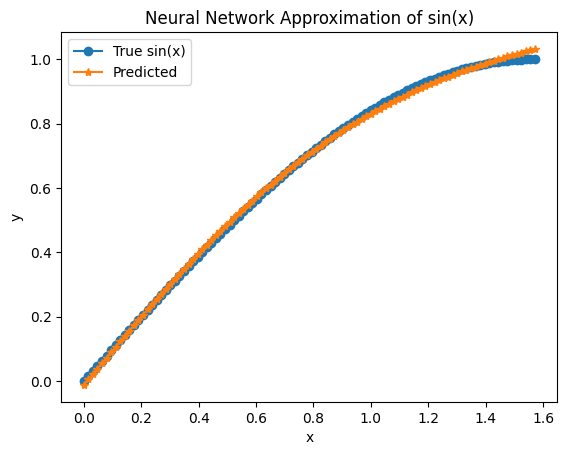

In [39]:
# e) Plot predicted and true functions
x_np = x_t.detach().numpy().ravel()
y_np = y_t.detach().numpy().ravel()
yhat_np = yhat.detach().numpy().ravel()

#TODO: plot predicted and true functions
plt.figure()
plt.plot(x_np, y_np,  marker='o',label='True sin(x)')
plt.plot(x_np, yhat_np,  marker='*', label='Predicted')
plt.title('Neural Network Approximation of sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()





```
# This is formatted as code
```

Repeat steps a). through e)., but change N so that N=4, 8, 16, 32, 100.




 When N = 4:


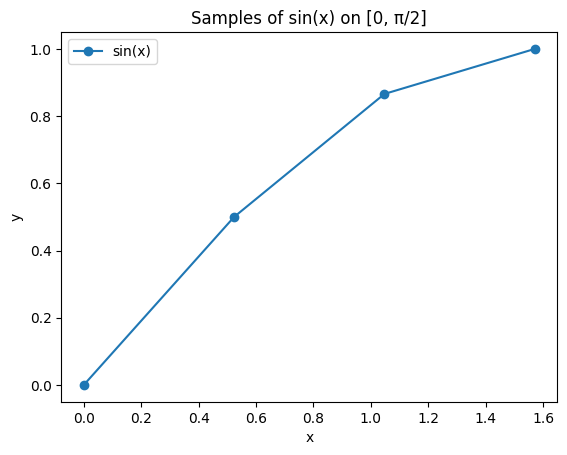

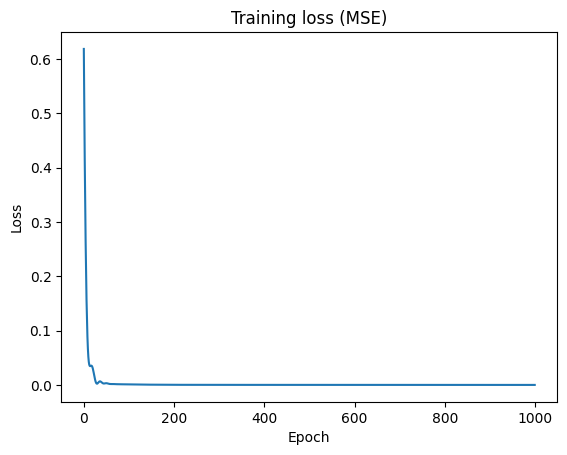

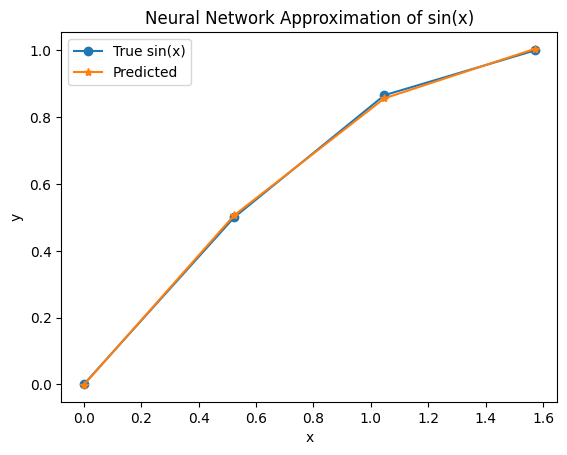


 When N = 8:


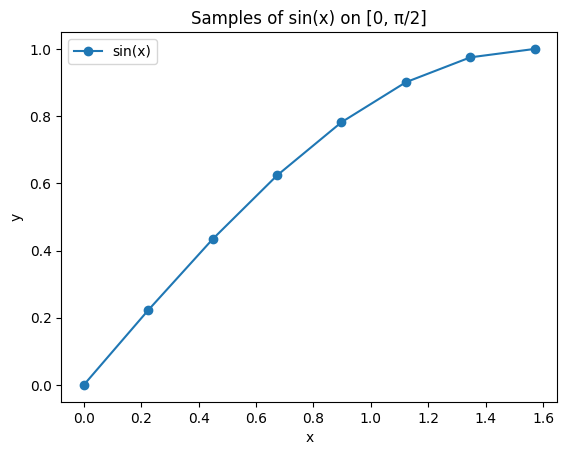

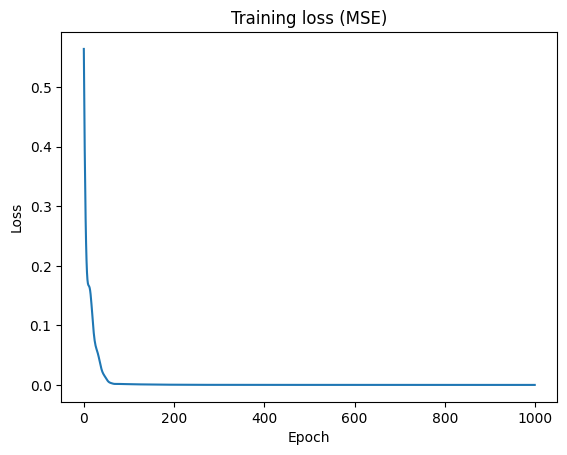

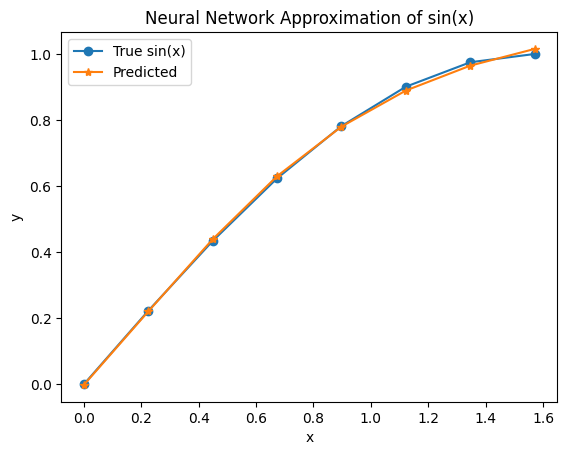


 When N = 16:


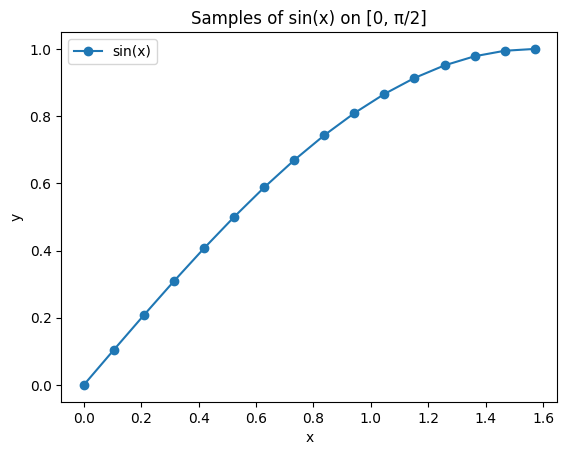

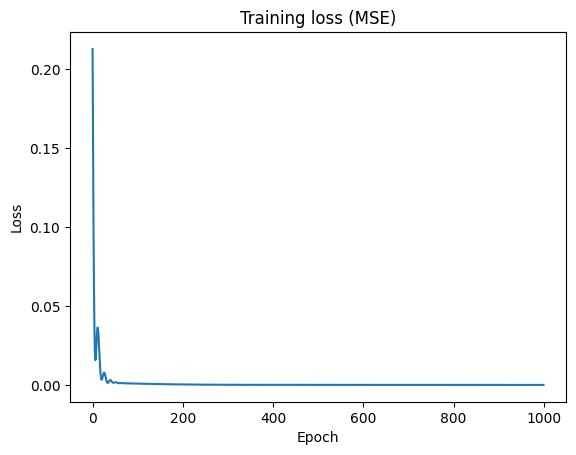

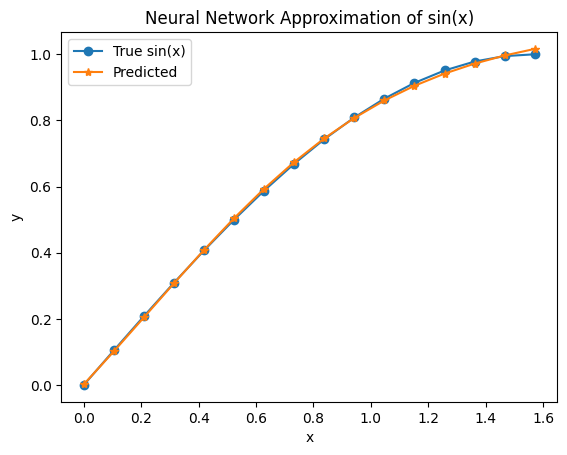


 When N = 32:


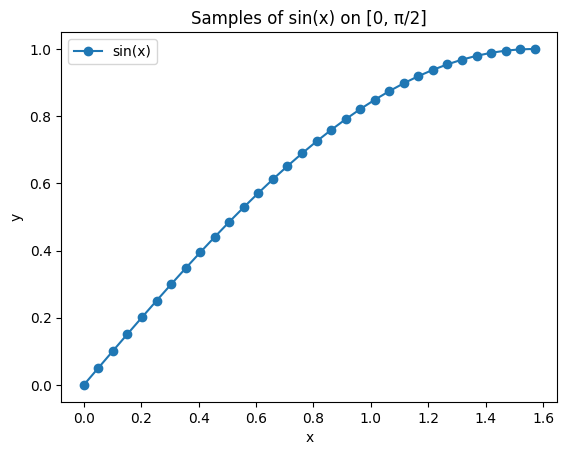

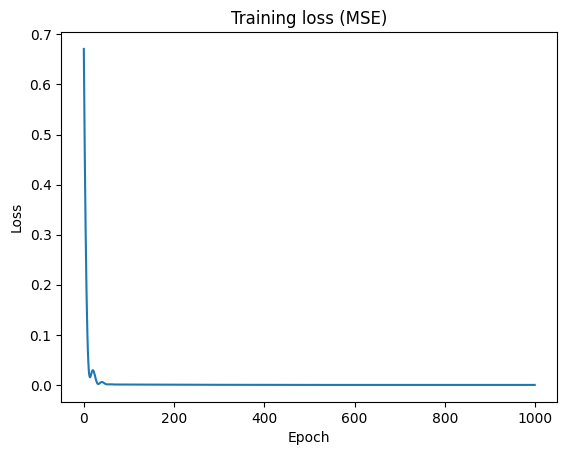

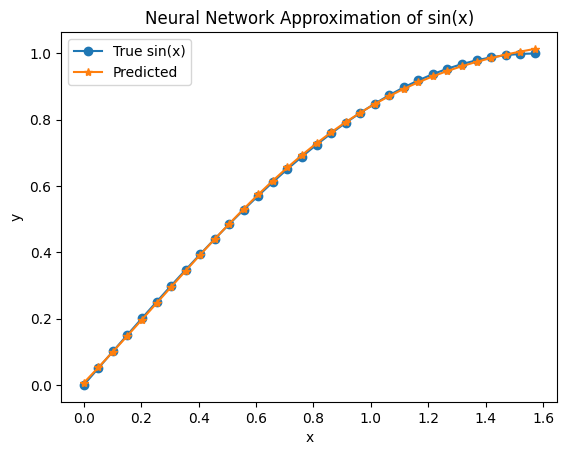


 When N = 100:


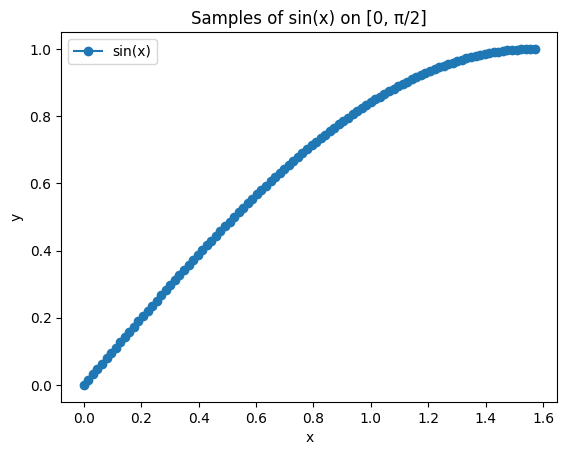

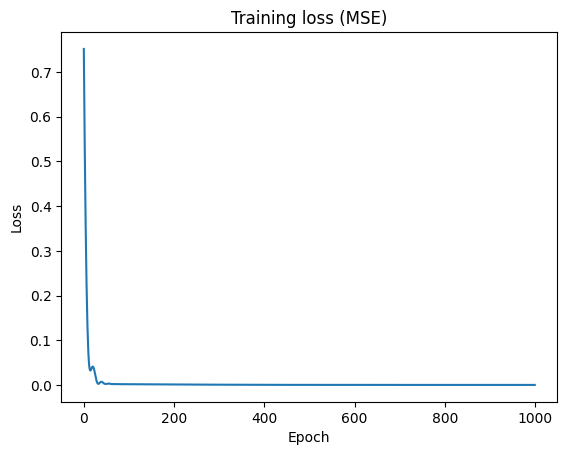

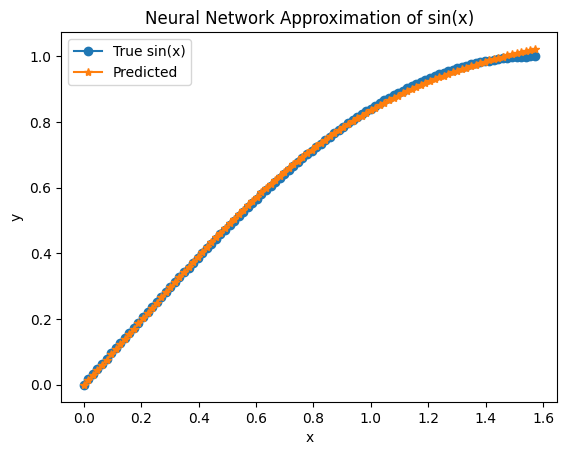

In [40]:
N_list = [4, 8, 16, 32, 100]
for N in N_list:
  print(f"\n When N = {N}:")

  # a) Generate N equidistant points on [0, pi/2] and plot y=sin(x)
  x = np.linspace(0, np.pi/2, N)
  y = np.sin(x)

  plt.figure()
  plt.plot(x, y, marker='o', linestyle='-', label='sin(x)')
  plt.title('Samples of sin(x) on [0, π/2]')
  plt.xlabel('x'); plt.ylabel('y')
  plt.legend(); plt.show()
  # b) Convert NumPy arrays to PyTorch tensors
  x_t = torch.from_numpy(x.reshape(-1, 1)).float()
  y_t = torch.from_numpy(y.reshape(-1, 1)).float()
  x_t.shape, y_t.shape
  # c) Define a simple 2-layer MLP with width 10 and Tanh activation
  class Net(nn.Module):
      def __init__(self, in_dim=1, hidden=10, out_dim=1, activation='tanh'):
          super().__init__()
          act = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid()}.get(activation, nn.Tanh())
          self.layer1 = nn.Linear(in_dim, hidden)
          self.act1 = act
          self.layer2 = nn.Linear(hidden, out_dim)
      def forward(self, x):
          x = self.act1(self.layer1(x))
          x = self.layer2(x)
          return x

  net = Net(hidden=10, activation='tanh')
  net

  # d) Optimizer, loss, and training loop (1000 epochs)
  optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
  loss_fn = nn.MSELoss()

  epochs = 1000
  loss_hist = []
  for i in range(epochs):
      optimizer.zero_grad()
      yhat = net(x_t)
      loss = loss_fn(yhat, y_t)
      loss.backward()
      optimizer.step()
      loss_hist.append(loss.item())

  plt.figure()
  plt.plot(loss_hist)
  plt.title('Training loss (MSE)')
  plt.xlabel('Epoch'); plt.ylabel('Loss')
  plt.show()

  with torch.no_grad():
      yhat = net(x_t)

  # e) Plot predicted and true functions
  x_np = x_t.detach().numpy().ravel()
  y_np = y_t.detach().numpy().ravel()
  yhat_np = yhat.detach().numpy().ravel()

  #TODO: plot predicted and true functions
  plt.figure()
  plt.plot(x_np, y_np,  marker='o',label='True sin(x)')
  plt.plot(x_np, yhat_np,  marker='*', label='Predicted')
  plt.title('Neural Network Approximation of sin(x)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()










```
# This is formatted as code
```

Keeping N= 100, change the network to have 10, and then 20 layers. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.

Training net10 (10 hidden layers)...
[Net depth=10] Epoch  100 - Loss: 0.000169
[Net depth=10] Epoch  200 - Loss: 0.000012
[Net depth=10] Epoch  300 - Loss: 0.000004
[Net depth=10] Epoch  400 - Loss: 0.001090
[Net depth=10] Epoch  500 - Loss: 0.000005
[Net depth=10] Epoch  600 - Loss: 0.000004
[Net depth=10] Epoch  700 - Loss: 0.000077
[Net depth=10] Epoch  800 - Loss: 0.000005
[Net depth=10] Epoch  900 - Loss: 0.000004
[Net depth=10] Epoch 1000 - Loss: 0.000111

Training net20 (20 hidden layers)...
[Net depth=20] Epoch  100 - Loss: 0.096471
[Net depth=20] Epoch  200 - Loss: 0.040324
[Net depth=20] Epoch  300 - Loss: 0.052841
[Net depth=20] Epoch  400 - Loss: 0.052841
[Net depth=20] Epoch  500 - Loss: 0.052841
[Net depth=20] Epoch  600 - Loss: 0.052840
[Net depth=20] Epoch  700 - Loss: 0.052840
[Net depth=20] Epoch  800 - Loss: 0.052840
[Net depth=20] Epoch  900 - Loss: 0.052840
[Net depth=20] Epoch 1000 - Loss: 0.052840


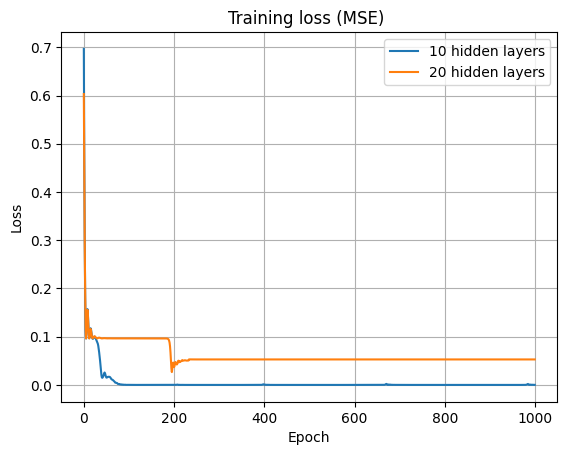

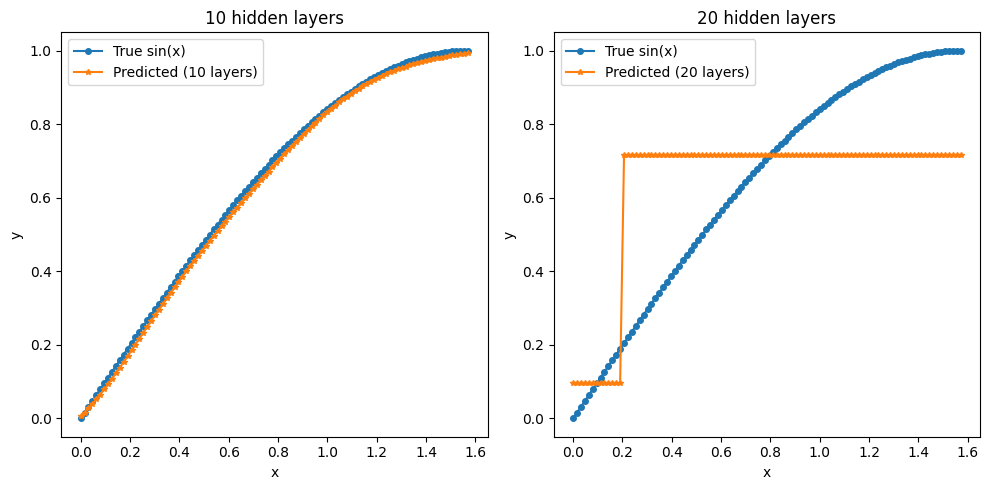

In [41]:
# a) Generate N equidistant points on [0, pi/2] and plot y=sin(x)
N = 100  # baseline
x = np.linspace(0, np.pi/2, N)
y = np.sin(x)

x_t = torch.from_numpy(x.reshape(-1, 1)).float()
y_t = torch.from_numpy(y.reshape(-1, 1)).float()

# c) Define a simple 2-layer MLP with width 10 and Tanh activation
class Net(nn.Module):
    def __init__(self, in_dim=1, hidden=10, layers = 2, out_dim=1, activation='tanh'):
        super().__init__()
        act = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid()}.get(activation, nn.Tanh())

        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(in_dim, hidden))

        for _ in range(layers - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))

        self.out = nn.Linear(hidden, out_dim)
        self.activation = act

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        return self.out(x)


net10 = Net(hidden=10, layers = 10, activation='tanh')
net20 = Net(hidden=10, layers = 20, activation='tanh')

# d) Optimizer, loss, and training loop (1000 epochs)
def train(net, x_t, y_t, epochs=1000, lr=0.01, print_every=100):
  optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
  loss_fn = nn.MSELoss()
  loss_hist = []
  for i in range(1, epochs + 1):
      net.train()
      optimizer.zero_grad()
      yhat = net(x_t)
      loss = loss_fn(yhat, y_t)
      loss.backward()
      optimizer.step()
      loss_hist.append(loss.item())
      if i % print_every == 0:
            print(f"[{net.__class__.__name__} depth={len(net.hidden_layers)}] Epoch {i:4d} - Loss: {loss.item():.6f}")

  net.eval()
  with torch.no_grad():
      yhat_final = net(x_t)

  return loss_hist, yhat_final

epochs = 1000
print("Training net10 (10 hidden layers)...")
loss10, yhat10 = train(net10, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)

print("\nTraining net20 (20 hidden layers)...")
loss20, yhat20 = train(net20, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)

plt.plot(loss10, label='10 hidden layers')
plt.plot(loss20, label='20 hidden layers')
plt.title('Training loss (MSE) ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# e) Plot predicted and true functions
x_np = x_t.detach().numpy().ravel()
y_np = y_t.detach().numpy().ravel()
yhat10_np = yhat10.detach().numpy().ravel()
yhat20_np = yhat20.detach().numpy().ravel()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat10_np, marker='*', label='Predicted (10 layers)', markersize=4)
plt.title('10 hidden layers')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat20_np, marker='*', label='Predicted (20 layers)', markersize=4)
plt.title('20 hidden layers')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()

plt.tight_layout()
plt.show()



When training the network with 10 hidden layers, the loss drops quickly and becomes very small, indicating that the network is able to learn and approximate the sin(x) function accurately. But the network with 20 hidden layers fails to reduce the loss meaningfully; it remains almost constant, showing that the network is not learning. This demonstrates that adding too many layers can make training harder, especially for a small dataset and a simple function. Likely reasons include vanishing gradients, overparameterization, and the network being unnecessarily deep for this problem.

Keeping N=100 and using 10 layers, alter the activation function of the network. Try instead of Tanh, the Sigmoid, ReLu, and Leaky ReLu activation functions. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.



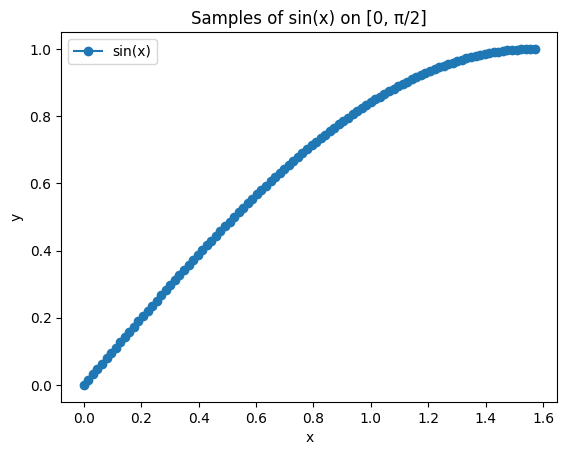

Training net_sigmoid, activation=sigmoid ...
[Net activation=Sigmoid()] Epoch  100 - Loss: 0.018927
[Net activation=Sigmoid()] Epoch  200 - Loss: 0.000143
[Net activation=Sigmoid()] Epoch  300 - Loss: 0.000045
[Net activation=Sigmoid()] Epoch  400 - Loss: 0.000043
[Net activation=Sigmoid()] Epoch  500 - Loss: 0.000042
[Net activation=Sigmoid()] Epoch  600 - Loss: 0.000041
[Net activation=Sigmoid()] Epoch  700 - Loss: 0.000041
[Net activation=Sigmoid()] Epoch  800 - Loss: 0.000040
[Net activation=Sigmoid()] Epoch  900 - Loss: 0.000039
[Net activation=Sigmoid()] Epoch 1000 - Loss: 0.000039

Training net_relu, activation=rulu ...
[Net activation=ReLU()] Epoch  100 - Loss: 0.000907
[Net activation=ReLU()] Epoch  200 - Loss: 0.000431
[Net activation=ReLU()] Epoch  300 - Loss: 0.000282
[Net activation=ReLU()] Epoch  400 - Loss: 0.000198
[Net activation=ReLU()] Epoch  500 - Loss: 0.000145
[Net activation=ReLU()] Epoch  600 - Loss: 0.000108
[Net activation=ReLU()] Epoch  700 - Loss: 0.000083
[

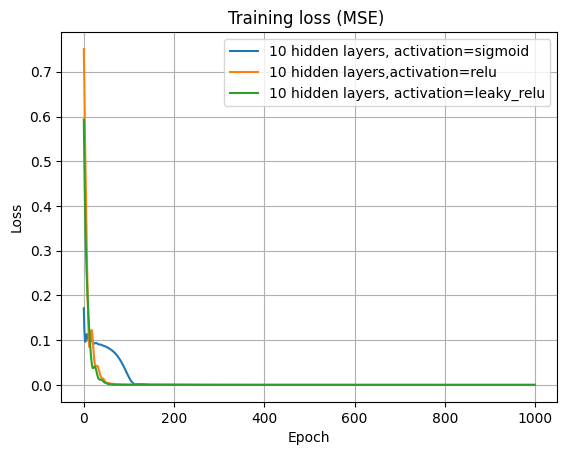

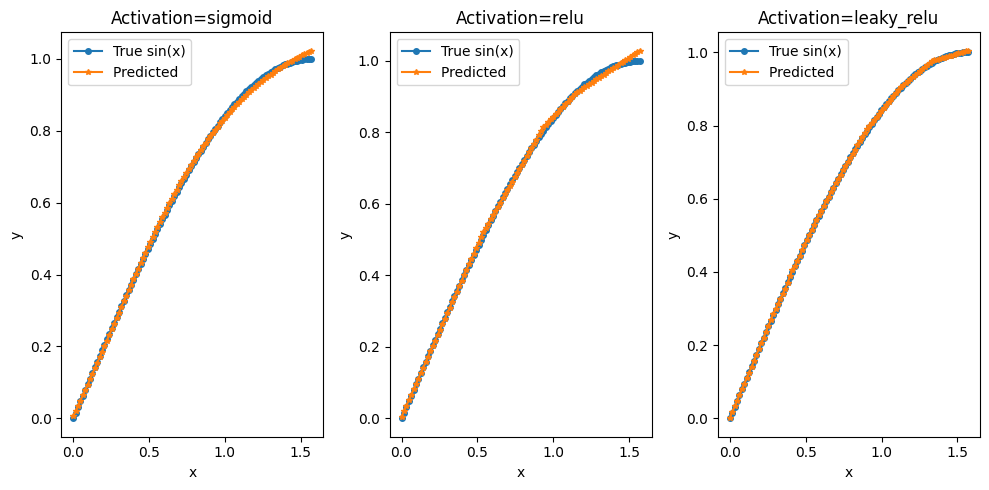

In [43]:
# a) Generate N equidistant points on [0, pi/2] and plot y=sin(x)
N = 100  # baseline
x = np.linspace(0, np.pi/2, N)
y = np.sin(x)

plt.figure()
plt.plot(x, y, marker='o', linestyle='-', label='sin(x)')
plt.title('Samples of sin(x) on [0, π/2]')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.show()
# b) Convert NumPy arrays to PyTorch tensors
x_t = torch.from_numpy(x.reshape(-1, 1)).float()
y_t = torch.from_numpy(y.reshape(-1, 1)).float()
x_t.shape, y_t.shape
# c) Define a simple 2-layer MLP with width 10 and Tanh activation
class Net(nn.Module):
    def __init__(self, in_dim=1, hidden=10, layers=2, out_dim=1, activation='tanh'):
        super().__init__()
        act = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(),'leaky_relu': nn.LeakyReLU()}.get(activation, nn.Tanh())
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(in_dim, hidden))

        for _ in range(layers - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))

        self.out = nn.Linear(hidden, out_dim)
        self.activation = act

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        return self.out(x)

net_sigmoid = Net(hidden=10, activation='sigmoid')
net_relu = Net(hidden=10, activation='relu')
net_leaky_relu = Net(hidden=10, activation='leaky_relu')





# d) Optimizer, loss, and training loop (1000 epochs)
def train(net, x_t, y_t, epochs=1000, lr=0.01, print_every=100):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    loss_hist = []
    for i in range(1, epochs+1):
        net.train()
        optimizer.zero_grad()
        yhat = net(x_t)
        loss = loss_fn(yhat, y_t)
        loss.backward()
        optimizer.step()
        loss_hist.append(loss.item())
        if i % print_every == 0:
            print(f"[{net.__class__.__name__} activation={net.activation}] Epoch {i:4d} - Loss: {loss.item():.6f}")

    net.eval()
    with torch.no_grad():
        yhat_final = net(x_t)
    return loss_hist, yhat_final

epochs = 1000
print("Training net_sigmoid, activation=sigmoid ...")
loss_sigmoid, yhat_sigmoid = train(net_sigmoid, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)

print("\nTraining net_relu, activation=rulu ...")
loss_relu, yhat_relu = train(net_relu, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)


print("\nTraining net_leaky_relu, activation=leaky_rulu ...")
loss_leaky_relu, yhat_leaky_relu = train(net_leaky_relu, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)

plt.plot(loss_sigmoid, label='10 hidden layers, activation=sigmoid')
plt.plot(loss_relu, label='10 hidden layers,activation=relu')
plt.plot(loss_leaky_relu, label='10 hidden layers, activation=leaky_relu')

plt.title('Training loss (MSE) ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# e) Plot predicted and true functions
x_np = x_t.detach().numpy().ravel()
y_np = y_t.detach().numpy().ravel()
yhat_sigmoid_np = yhat_sigmoid.detach().numpy().ravel()
yhat_relu_np = yhat_relu.detach().numpy().ravel()
yhat_leaky_relu_np = yhat_leaky_relu.detach().numpy().ravel()



plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat_sigmoid_np, marker='*', label='Predicted ', markersize=4)
plt.title('Activation=sigmoid')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat_relu_np, marker='*', label='Predicted ', markersize=4)
plt.title('Activation=relu')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()


plt.subplot(1, 3, 3)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat_leaky_relu_np, marker='*', label='Predicted ', markersize=4)
plt.title('Activation=leaky_relu')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()

plt.tight_layout()
plt.show()

Sigmoid activation: The network trains very quickly at first, with the loss dropping from 0.012 to almost 0 within a few hundred epochs, then slowly converging. Sigmoid saturates for large inputs, but in this simple regression task, it still achieves very low final loss.

ReLU activation: The loss starts much lower than sigmoid (0.0006) and decreases steadily but more gradually over time. ReLU avoids saturation, so the network improves steadily, but the convergence is slower compared to sigmoid in this case.

Leaky ReLU activation: Training starts slightly higher (0.00078) but decreases consistently and faster than ReLU. The final loss is the lowest among the three (~0.000014), indicating that Leaky ReLU may give slightly better performance and stability because it prevents “dying neurons” that can occur with standard ReLU.

Keeping N=100 and using 10 layers, and the Tanh activation function, play with changing the learning rate of the network. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.


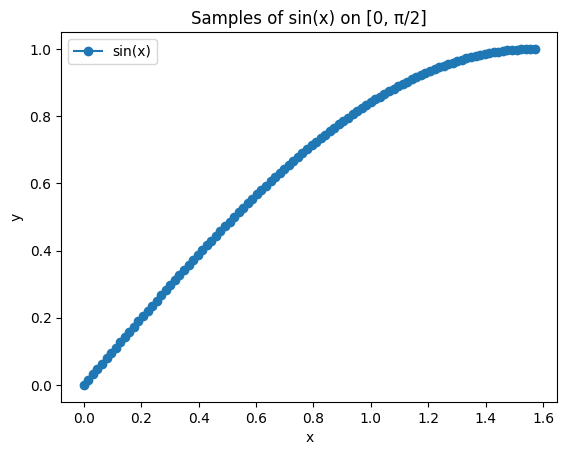


Training with learning rate = 0.001 ...
[Net activation=Tanh()] Epoch  100 - Loss: 0.029152
[Net activation=Tanh()] Epoch  200 - Loss: 0.002231
[Net activation=Tanh()] Epoch  300 - Loss: 0.001628
[Net activation=Tanh()] Epoch  400 - Loss: 0.001297
[Net activation=Tanh()] Epoch  500 - Loss: 0.000998
[Net activation=Tanh()] Epoch  600 - Loss: 0.000744
[Net activation=Tanh()] Epoch  700 - Loss: 0.000540
[Net activation=Tanh()] Epoch  800 - Loss: 0.000384
[Net activation=Tanh()] Epoch  900 - Loss: 0.000271
[Net activation=Tanh()] Epoch 1000 - Loss: 0.000194

Training with learning rate = 0.01 ...
[Net activation=Tanh()] Epoch  100 - Loss: 0.000057
[Net activation=Tanh()] Epoch  200 - Loss: 0.000044
[Net activation=Tanh()] Epoch  300 - Loss: 0.000034
[Net activation=Tanh()] Epoch  400 - Loss: 0.000028
[Net activation=Tanh()] Epoch  500 - Loss: 0.000025
[Net activation=Tanh()] Epoch  600 - Loss: 0.000023
[Net activation=Tanh()] Epoch  700 - Loss: 0.000021
[Net activation=Tanh()] Epoch  800 

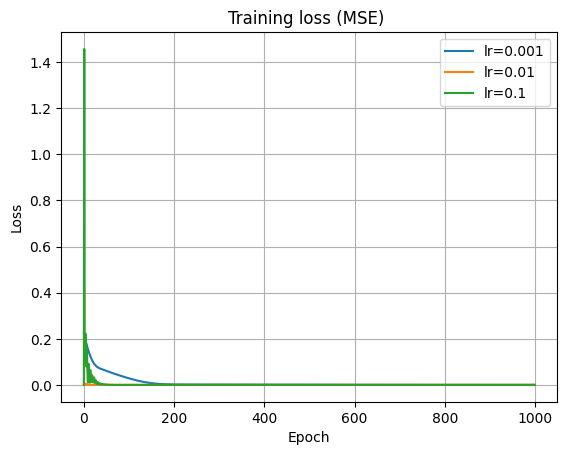

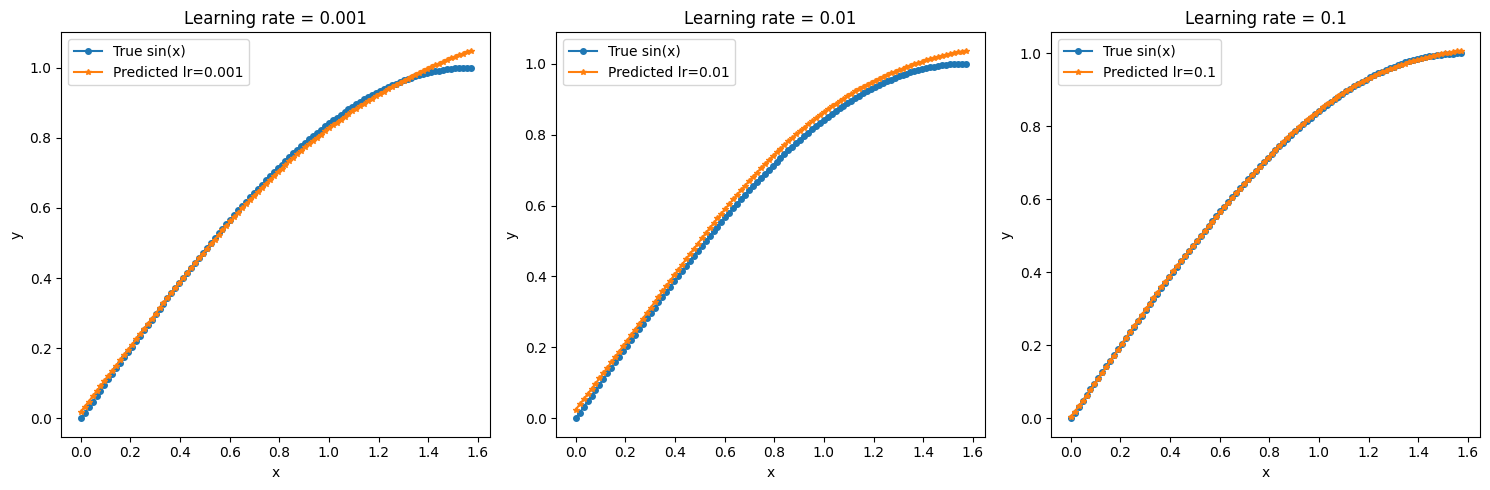

In [44]:
# a) Generate N equidistant points on [0, pi/2] and plot y=sin(x)
N = 100  # baseline
x = np.linspace(0, np.pi/2, N)
y = np.sin(x)

plt.figure()
plt.plot(x, y, marker='o', linestyle='-', label='sin(x)')
plt.title('Samples of sin(x) on [0, π/2]')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.show()
# b) Convert NumPy arrays to PyTorch tensors
x_t = torch.from_numpy(x.reshape(-1, 1)).float()
y_t = torch.from_numpy(y.reshape(-1, 1)).float()
x_t.shape, y_t.shape
# c) Define a simple 2-layer MLP with width 10 and Tanh activation
class Net(nn.Module):
    def __init__(self, in_dim=1, hidden=10, layers=2, out_dim=1, activation='tanh'):
        super().__init__()
        act = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(),'leaky_relu': nn.LeakyReLU()}.get(activation, nn.Tanh())
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(in_dim, hidden))

        for _ in range(layers - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))

        self.out = nn.Linear(hidden, out_dim)
        self.activation = act

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        return self.out(x)

net10 = Net(hidden=10, activation='tanh')


# d) Optimizer, loss, and training loop (1000 epochs)
def train(net, x_t, y_t, epochs=1000, lr=0.01, print_every=100):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    loss_hist = []
    for i in range(1, epochs+1):
        net.train()
        optimizer.zero_grad()
        yhat = net(x_t)
        loss = loss_fn(yhat, y_t)
        loss.backward()
        optimizer.step()
        loss_hist.append(loss.item())
        if i % print_every == 0:
            print(f"[{net.__class__.__name__} activation={net.activation}] Epoch {i:4d} - Loss: {loss.item():.6f}")

    net.eval()
    with torch.no_grad():
        yhat_final = net(x_t)
    return loss_hist, yhat_final

learning_rates = [0.001, 0.01, 0.1]
predictions = {}


plt.figure()
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr} ...")
    loss, yhat = train(net10, x_t, y_t, epochs=1000, lr=lr, print_every=100)
    plt.plot(loss, label=f'lr={lr}')
    predictions[lr] = yhat.detach().numpy().ravel()  # store predictions

plt.title('Training loss (MSE) ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# e) Plot predicted and true functions
x_np = x_t.detach().numpy().ravel()
y_np = y_t.detach().numpy().ravel()


plt.figure(figsize=(15, 5))
for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i+1)
    plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
    plt.plot(x_np, predictions[lr], marker='*', label=f'Predicted lr={lr}', markersize=4)
    plt.title(f'Learning rate = {lr}')
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


As the learning rate increases, the network trains faster. With a low learning rate (0.001), the loss decreases steadily but slowly. A moderate learning rate (0.01) allows the network to converge quickly and stably, while a high learning rate (0.1) speeds up training further but introduces small fluctuations before stabilizing. Overall, higher learning rates accelerate learning but can slightly reduce stability.

Keeping N=100 and using 10 layers, and the
Tanh, change the width of each layer. Try width=5 and width=10. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.


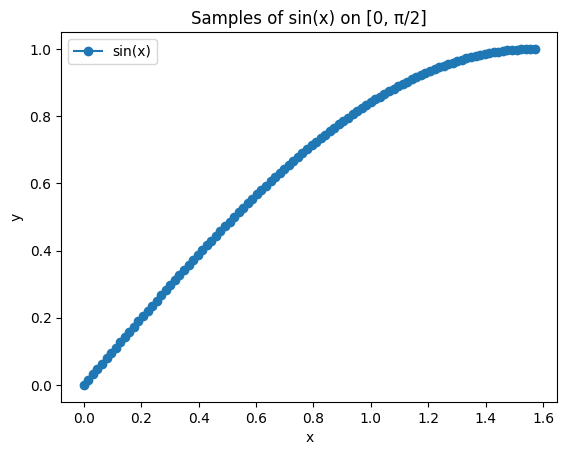


Training net5 (width=5)...
[Net activation=Tanh()] Epoch  100 - Loss: 0.000072
[Net activation=Tanh()] Epoch  200 - Loss: 0.000052
[Net activation=Tanh()] Epoch  300 - Loss: 0.000047
[Net activation=Tanh()] Epoch  400 - Loss: 0.000046
[Net activation=Tanh()] Epoch  500 - Loss: 0.000045
[Net activation=Tanh()] Epoch  600 - Loss: 0.000045
[Net activation=Tanh()] Epoch  700 - Loss: 0.000044
[Net activation=Tanh()] Epoch  800 - Loss: 0.000043
[Net activation=Tanh()] Epoch  900 - Loss: 0.000043
[Net activation=Tanh()] Epoch 1000 - Loss: 0.000042
Training net10 (width=10)...
[Net activation=Tanh()] Epoch  100 - Loss: 0.000285
[Net activation=Tanh()] Epoch  200 - Loss: 0.000054
[Net activation=Tanh()] Epoch  300 - Loss: 0.000046
[Net activation=Tanh()] Epoch  400 - Loss: 0.000041
[Net activation=Tanh()] Epoch  500 - Loss: 0.000037
[Net activation=Tanh()] Epoch  600 - Loss: 0.000035
[Net activation=Tanh()] Epoch  700 - Loss: 0.000033
[Net activation=Tanh()] Epoch  800 - Loss: 0.000031
[Net ac

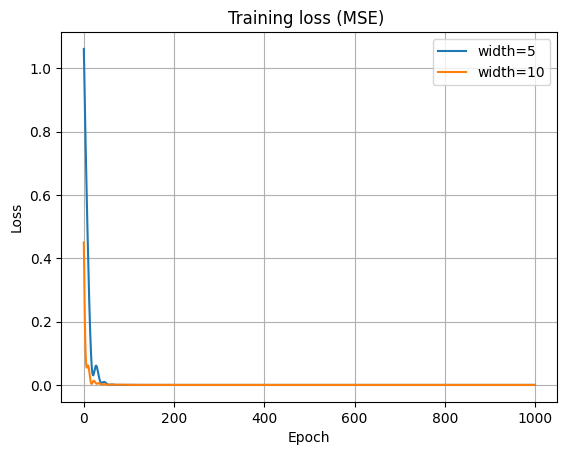

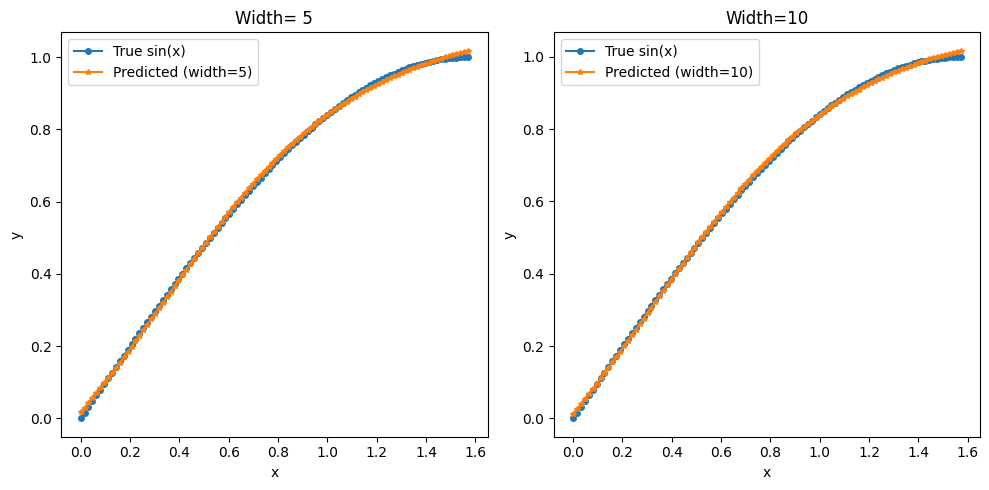

In [33]:
# a) Generate N equidistant points on [0, pi/2] and plot y=sin(x)
N = 100  # baseline
x = np.linspace(0, np.pi/2, N)
y = np.sin(x)

plt.figure()
plt.plot(x, y, marker='o', linestyle='-', label='sin(x)')
plt.title('Samples of sin(x) on [0, π/2]')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.show()
# b) Convert NumPy arrays to PyTorch tensors
x_t = torch.from_numpy(x.reshape(-1, 1)).float()
y_t = torch.from_numpy(y.reshape(-1, 1)).float()
x_t.shape, y_t.shape
# c) Define a simple 2-layer MLP with width 10 and Tanh activation
class Net(nn.Module):
    def __init__(self, in_dim=1, hidden=10, layers=2, out_dim=1, activation='tanh'):
        super().__init__()
        act = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(),'leaky_relu': nn.LeakyReLU()}.get(activation, nn.Tanh())
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(in_dim, hidden))

        for _ in range(layers - 1):
            self.hidden_layers.append(nn.Linear(hidden, hidden))

        self.out = nn.Linear(hidden, out_dim)
        self.activation = act

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        return self.out(x)

net5 = Net(hidden=5, activation='tanh')
net10 = Net(hidden=10, activation='tanh')



# d) Optimizer, loss, and training loop (1000 epochs)
def train(net, x_t, y_t, epochs=1000, lr=0.01, print_every=100):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    loss_hist = []
    for i in range(1, epochs+1):
        net.train()
        optimizer.zero_grad()
        yhat = net(x_t)
        loss = loss_fn(yhat, y_t)
        loss.backward()
        optimizer.step()
        loss_hist.append(loss.item())
        if i % print_every == 0:
            print(f"[{net.__class__.__name__} activation={net.activation}] Epoch {i:4d} - Loss: {loss.item():.6f}")

    net.eval()
    with torch.no_grad():
        yhat_final = net(x_t)
    return loss_hist, yhat_final


epochs = 1000

print("\nTraining net5 (width=5)...")
loss5, yhat5 = train(net5, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)

print("Training net10 (width=10)...")
loss10, yhat10 = train(net10, x_t, y_t, epochs=epochs, lr=0.01, print_every=100)

plt.plot(loss5, label='width=5')
plt.plot(loss10, label='width=10')
plt.title('Training loss (MSE) ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# e) Plot predicted and true functions
x_np = x_t.detach().numpy().ravel()
y_np = y_t.detach().numpy().ravel()
yhat5_np = yhat5.detach().numpy().ravel()

yhat10_np = yhat10.detach().numpy().ravel()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat5_np, marker='*', label='Predicted (width=5)', markersize=4)
plt.title('Width= 5')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_np, y_np, marker='o', label='True sin(x)', markersize=4)
plt.plot(x_np, yhat10_np, marker='*', label='Predicted (width=10)', markersize=4)
plt.title('Width=10')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()

plt.tight_layout()
plt.show()


Width=5: The network starts with a lower loss at epoch 100 and decreases gradually. It converges slowly and plateaus around 0.000042. The network has fewer parameters, so it has less capacity to fully capture the function, but it still learns reasonably well.


Width=10: The network starts with a higher initial loss but decreases faster and reaches a lower final loss around 0.000030. The larger width provides more parameters, allowing the network to fit the sine function more accurately and converge more efficiently.


So increasing the width of each hidden layer improves the network's capacity to learn complex functions. Wider layers tend to converge faster and achieve a lower final loss in contrast to narrower layers.

**Bonus question: Repeat the first problem with N=100 and 10 layers, but instead of reconstructing the sine function, import a sound wave through Librosa, sample it and then reconstruct the sound from the samples through a network.**

https://librosa.org/doc/latest/index.html

Alter the activation function, learning rate, and and width. Notice changes in training speed and accuracy.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Device: cpu
MLP(
  (act): ReLU()
  (hidden_layers): ModuleList(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1-9): 9 x Linear(in_features=128, out_features=128, bias=True)
  )
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Epoch    1 / 2000 - Loss: 1.145456e-02
Epoch  100 / 2000 - Loss: 1.003611e-02
Epoch  200 / 2000 - Loss: 9.894287e-03
Epoch  300 / 2000 - Loss: 9.893127e-03
Epoch  400 / 2000 - Loss: 9.894051e-03
Epoch  500 / 2000 - Loss: 9.895479e-03
Epoch  600 / 2000 - Loss: 9.892922e-03
Epoch  700 / 2000 - Loss: 9.892736e-03
Epoch  800 / 2000 - Loss: 9.894579e-03
Epoch  900 / 2000 - Loss: 9.892400e-03
Epoch 1000 / 2000 - Loss: 9.892354e-03
Epoch 1100 / 2000 - Loss: 9.893375e-03
Epoch 1200 / 2000 - Loss: 9.892064e-03
Epoch 1300 / 2000 - Loss: 9.892079e-03
Epoch 1400 / 2000 - Loss: 9.891684e-03
Epoch 1500 / 2000 - Loss: 9.

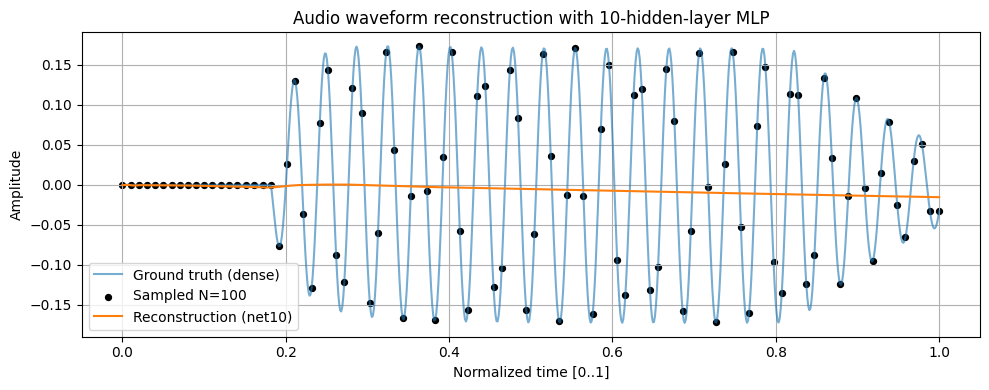

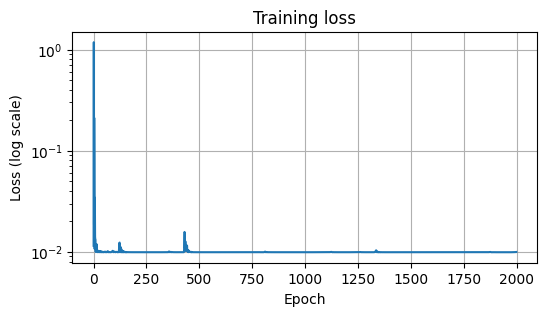

Wrote reconstructed audio to /content/reconstructed_net10.wav


In [6]:
# --- Bonus: Audio reconstruction with a 10-layer MLP ---
# This cell expects librosa (and optionally soundfile) in your environment.
# 1) Set AUDIO_PATH to a local .wav or .mp3 file.
# 2) We will load mono audio at 8 kHz, take a 0.5 s slice, sample N=100 points,
#    and train a 10-layer MLP to regress the waveform. Then we compare/reconstruct.


from google.colab import drive
drive.mount('/content/drive')

# Put your .wav somewhere in Drive and set the full path:
# replace path with the set of folders in your drive that the wav file lives in
# AUDIO_PATH = "/content/drive/MyDrive/path/ex1.wav"
AUDIO_PATH = "/content/drive/MyDrive/ex1.wav"  # <-- your path


# --- Imports & checks ---
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# reproducibility
np.random.seed(0)
torch.manual_seed(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


# Try librosa; if unavailable, explain and exit gracefully
try:
    import librosa
    have_librosa = True
except Exception as e:
    have_librosa = False
    print("librosa is not available in this environment. To run this cell:")
    print("  - install librosa (e.g., `pip install librosa`)")
    print("  - then re-run this cell.")

# Optional: writing audio
try:
    import soundfile as sf
    have_sf = True
except Exception:
    have_sf = False

if have_librosa:
    # --- Load audio ---
    try:
        y, sr = librosa.load(AUDIO_PATH, sr=8000, mono=True)  # resample to 8 kHz
    except Exception as e:
        # If loading fails, synthesize a short tone so the cell still demonstrates the pipeline.
        print(f"Could not read {AUDIO_PATH}: {e}")
        print("Falling back to a synthetic 440 Hz tone for demonstration.")
        sr = 8000
        T = 0.5
        t = np.linspace(0, T, int(sr*T), endpoint=False)
        y = 0.6*np.sin(2*np.pi*440*t)

    # --- Take a 0.1 s segment (or shorter if the file is short) ---
    T = 0.1
    seg_len = int(min(len(y), int(sr*T)))
    y_seg = y[:seg_len].astype(np.float32)
    t_full = np.arange(seg_len) / sr  # time axis in seconds

     # --- Build the supervised sample of size N=100 ---
    N = 100
    sample_idx = np.linspace(0, seg_len-1, N).astype(int)
    t_sample = sample_idx / float(seg_len - 1)  # normalize time to [0,1]
    y_sample = y_seg[sample_idx]



    # normalized time in [0, 1] for stability; map to [0, seg_len-1] via fractional indices
    t_full = np.arange(seg_len) / float(seg_len - 1)   # normalized to [0,1]
    y_full = y_seg  # ground truth dense waveform


    # Interpolate ground-truth waveform at sample locations

    # Torch tensors
    x_train = torch.from_numpy(t_sample.reshape(-1, 1)).float().to(device)
    y_train = torch.from_numpy(y_sample.reshape(-1, 1)).float().to(device)

    x_dense = torch.from_numpy(t_full.reshape(-1, 1)).float().to(device)


# --- Define a 10-layer MLP ---
class MLP(nn.Module):
  def __init__(self, in_dim=1, hidden=128, n_hidden_layers=10, out_dim=1, activation='relu'):
    super().__init__()
    assert n_hidden_layers >= 1
    act_map = {'tanh': nn.Tanh(), 'relu': nn.ReLU(), 'leakyrelu': nn.LeakyReLU(0.2)}
    self.act = act_map.get(activation, nn.ReLU())
    layers = []
    # first layer
    layers.append(nn.Linear(in_dim, hidden))
    # hidden layers
    for _ in range(n_hidden_layers - 1):
        layers.append(nn.Linear(hidden, hidden))
    self.hidden_layers = nn.ModuleList(layers)
    self.out = nn.Linear(hidden, out_dim)

    # init: small weights help with regression tasks
    for m in self.modules():
        if isinstance(m, nn.Linear):
            nn.init.kaiming_uniform_(m.weight, a=0.0 if activation == 'relu' else np.sqrt(5))
            if m.bias is not None:
                nn.init.zeros_(m.bias)
  def forward(self, x):
    for layer in self.hidden_layers:
        x = self.act(layer(x))
    x = self.out(x)
    return x

# instantiate a 10-layer network (10 hidden layers)
net10 = MLP(in_dim=1, hidden=128, n_hidden_layers=10, out_dim=1, activation='relu').to(device)
print(net10)


    # --- Train ---
lr = 1e-3
epochs = 2000
optimizer = torch.optim.Adam(net10.parameters(), lr=lr)
loss_fn = nn.MSELoss()

loss_hist = []
print_every = 100

# Training loop
for epoch in range(1, epochs + 1):
    net10.train()
    optimizer.zero_grad()
    yhat = net10(x_train)
    loss = loss_fn(yhat, y_train)
    loss.backward()
    optimizer.step()

    loss_hist.append(loss.item())
    if epoch % print_every == 0 or epoch == 1:
        print(f"Epoch {epoch:4d} / {epochs} - Loss: {loss.item():.6e}")

# --- Reconstruct on dense grid ---
net10.eval()
with torch.no_grad():
    yhat_dense = net10(x_dense).cpu().numpy().ravel()

# Convert ground truth dense waveform to numpy for plotting
y_full_np = y_full.astype(np.float32)

# --- Plots ---
plt.figure(figsize=(10, 4))
# full waveform (ground truth)
plt.plot(t_full, y_full_np, color='tab:blue', alpha=0.6, label='Ground truth (dense)')
# sampled points
plt.scatter(t_sample, y_sample, color='black', s=18, label=f'Sampled N={N}')
# reconstruction
plt.plot(t_full, yhat_dense, color='tab:orange', linewidth=1.5, label='Reconstruction (net10)')
plt.title('Audio waveform reconstruction with 10-hidden-layer MLP')
plt.xlabel('Normalized time [0..1]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot training loss (log scale)
plt.figure(figsize=(6,3))
plt.plot(loss_hist, label='MSE Loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.title('Training loss')
plt.grid(True)
plt.show()

# Optional: write reconstructed audio (upsampled to original sr) if soundfile available
try:
    import soundfile as sf
    out_recon = np.clip(yhat_dense, -1.0, 1.0)  # clip to safe range
    out_path = '/content/reconstructed_net10.wav'
    sf.write(out_path, out_recon, sr)
    print("Wrote reconstructed audio to", out_path)
except Exception as e:
    print("soundfile not available or write failed:", e)
    print("Skipping writing reconstructed audio.")



---

## Grading Rubric (100 points total)

**Part 1: Baseline fit (N=100)** (a–e) — *20 pts*  
- Correct data generation & plot (a,b) — 7 pts  
- Model definition (2-layer, width 10) — 7 pts  
- Training loop & loss plot — 4 pts  
- Predicted vs true plot — 2 pt  

**Part 2: Sample size sweep (N = 4, 8, 16, 32, 100)** — *20 pts*  
- Correct runs for each N — 15 pts  
- Figure(s) with sensible legends — 3 pt  
- Brief discussion (1–3 sentences) on effect of N — 2 pts  

**Part 3: Depth variation (keep N=100)** — *20 pts*  
- Comparison across multiple depths — 15 pts  
- Plot(s) and short discussion — 5 pts  

**Part 4: Activation variation (keep N=100)** — *20 pts*  
- Runs for ≥2 different activations — 10 pts  
- Plot(s) and short discussion — 10 pts  

**Part 5: Optimization settings** — *10 pts*  
- Learning-rate comparison or epochs comparison — 6 pts  
- Plot(s) and short discussion — 4 pts  

**Professionalism** — *10 pts*  
- Clean, readable figures; code runs top-to-bottom; answers clearly written.

---

## AI-use Statement (required)

You may use AI tools (e.g., ChatGPT) for **debugging help, code explanations, or editing prose**, provided you:

1. **Disclose** any AI assistance you used at the end of your notebook.  
2. **Cite** prompts or pasted outputs you relied on (copy/paste or summarize).  
3. **Verify** the correctness and **use your own words**.  
4. Do **not** paste full solutions. Your submission must reflect your understanding.

**AI-use Disclosure (fill in):**  
I used AI tools as follows: I used AI tools (ChatGPT) to explain PyTorch concepts and help clarify given neural network code structure.  
Prompts / outputs used (summarize or paste short snippets):
- Explain nn.Module and nn.ModuleList in PyTorch.

Snippet:

 - The base class for all neural network models in PyTorch.

Every custom network you define should inherit from nn.Module.

It handles the management of parameters, layers, and the forward() method.


- Explain how a 10-layer MLP works and how to define it in PyTorch.

Snippets:

- A container to store multiple layers (or modules) in a list, like Python's list, but keeps track of parameters.

Useful when you want dynamic architectures, e.g., loops over multiple layers.
